In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_2004 = pd.read_csv('table_tableau2004.csv', encoding="latin1")
df_2006 = pd.read_csv('table_tableau2006.csv', encoding="latin1")
df_2009 = pd.read_csv('table_tableau2009.csv', encoding="latin1")
df_2011 = pd.read_csv('table_tableau2011.csv', encoding="latin1")
df_2015 = pd.read_csv('table_tableau2015.csv', encoding="latin1")
df_2019 = pd.read_csv('table_tableau2019.csv', encoding="latin1")
df_2021 = pd.read_csv('table_tableau2021.csv', encoding="utf-8-sig")
df_2025 = pd.read_csv('CandidatesVotes 2025.csv',encoding="utf-8-sig")

#Creating a new column called Party
df_2004['Party'] = df_2004['Elected Candidate'].str.extract(r'(\w+)$')
df_2006['Party'] = df_2006['Elected Candidate'].str.extract(r'(\w+)$')
df_2009['Party'] = df_2009['Elected Candidate'].str.extract(r'(\w+)$')
df_2011['Party'] = df_2011['Elected Candidate'].str.extract(r'(\w+)$')
df_2015['Party'] = df_2015['Elected Candidate'].str.extract(r'(\w+)$')
df_2019['Party'] = df_2019['Elected Candidate'].str.extract(r'(\w+)$')
df_2021['Party'] = df_2021['Elected Candidate'].str.extract(r'(\w+)$')

#Extracting the candidate name from the Elected Candidate Column
df_2004['Candidate'] = df_2004['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2004.drop(columns=['Elected Candidate'], inplace=True)
df_2004['Party'] = df_2004['Party'].str.strip()

df_2006['Candidate'] = df_2006['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2006.drop(columns=['Elected Candidate'], inplace=True)
df_2006['Party'] = df_2006['Party'].str.strip()

df_2009['Candidate'] = df_2009['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2009.drop(columns=['Elected Candidate'], inplace=True)
df_2009['Party'] = df_2009['Party'].str.strip()

df_2011['Candidate'] = df_2011['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2011.drop(columns=['Elected Candidate'], inplace=True)
df_2011['Party'] = df_2011['Party'].str.strip()

df_2015['Candidate'] = df_2015['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2015.drop(columns=['Elected Candidate'], inplace=True)
df_2015['Party'] = df_2015['Party'].str.strip()

df_2019['Candidate'] = df_2019['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2019.drop(columns=['Elected Candidate'], inplace=True)
df_2019['Party'] = df_2019['Party'].str.strip()

df_2021['Candidate'] = df_2021['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2021.drop(columns=['Elected Candidate'], inplace=True)
df_2021['Party'] = df_2021['Party'].str.strip()

df_2025 = df_2025.dropna(subset=['Valid Ballots'])
df_2025['Valid Ballots'] = df_2025['Valid Ballots'].str.replace(',', '').astype(int)

# Grouping vote totals by party
votes_2004 = df_2004.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2006 = df_2006.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2009 = df_2009.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2011 = df_2011.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2015 = df_2015.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2019 = df_2019.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2021 = df_2021.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2025 = df_2025.groupby('Party')['Valid Ballots'].sum().reset_index()

# Adding a column to distinguish the year
votes_2004['Year'] = '2004'
votes_2006['Year'] = '2006'
votes_2009['Year'] = '2009'
votes_2011['Year'] = '2011'
votes_2015['Year'] = '2015'
votes_2019['Year'] = '2019'
votes_2021['Year'] = '2021'
votes_2025['Year'] = '2025'

#Merging all years years into one DataFrame
combined_votes = pd.concat([votes_2004, votes_2006, votes_2009, votes_2011, votes_2015, votes_2019, votes_2021, votes_2025], ignore_index=True)
combined_votes = combined_votes.groupby(['Year', 'Party'])['Valid Ballots']. sum().reset_index()

combined_all = pd.concat([df_2004, df_2006, df_2009, df_2011, df_2015, df_2019, df_2021, df_2025], ignore_index=True)

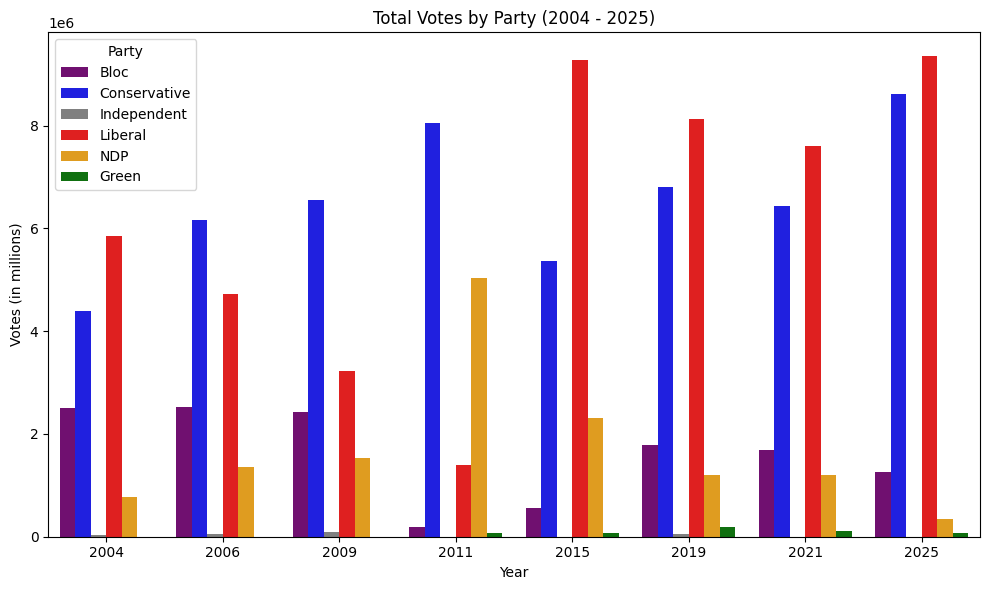

In [2]:
party_colors = {
    'Liberal': 'red',
    'Conservative': 'blue',
    'NDP': 'orange',
    'Bloc': 'purple',
    'Green': 'green',
    'Independent': 'gray'
}

#Bar Chart of Total Votes by Party for Each Election year
os.makedirs("images", exist_ok=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=combined_votes, x='Year', y='Valid Ballots', hue='Party', palette = party_colors)
plt.title('Total Votes by Party (2004 - 2025)')
plt.ylabel('Votes (in millions)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig("images/total_votes_by_party.png", dpi=300, bbox_inches='tight')

plt.show()

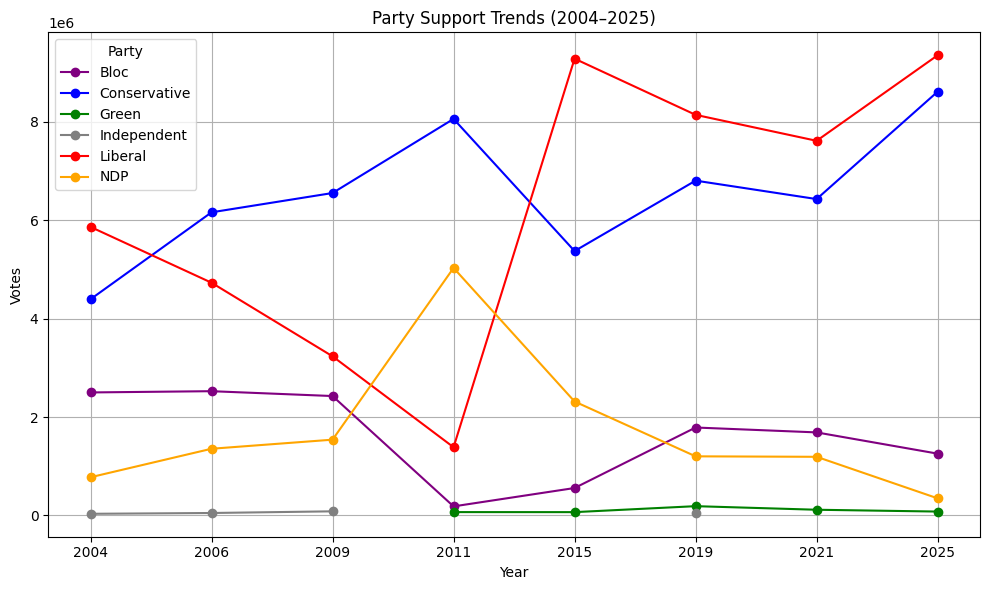

In [3]:
#line graph to show voting Trends over time
os.makedirs("images", exist_ok=True)

pivot = combined_votes.pivot(index='Year', columns='Party', values='Valid Ballots')
ax = pivot.plot(kind='line', marker='o', figsize=(10, 6), color=[party_colors.get(col, 'black') for col in pivot.columns])

plt.title('Party Support Trends (2004–2025)')
plt.ylabel('Votes')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()

plt.savefig("images/part_support_trends.png", dpi=300, bbox_inches='tight')

plt.show()

#One outlier is the Liberals' vote share jumped significantly from 2011 Elections to 2015 Elections.

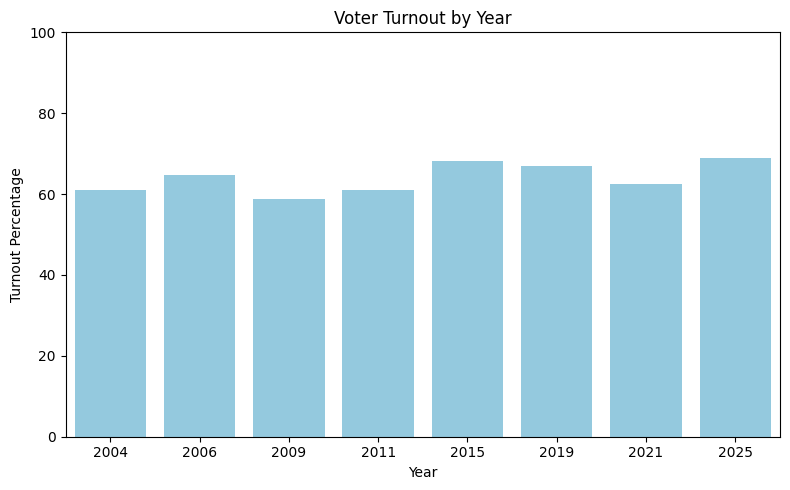

In [4]:
#A bar chart to show voter turnout by Year
os.makedirs("images", exist_ok=True)

turnout_df = pd.DataFrame({
    'Year': [2004, 2006, 2009, 2011, 2015, 2019, 2021, 2025],
    'Turnout (%)': [60.90, 64.70, 58.80, 61.10, 68.30, 67.00, 62.60, 69.00]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=turnout_df, x='Year', y='Turnout (%)', color='skyblue')
plt.title('Voter Turnout by Year')
plt.ylabel('Turnout Percentage')
plt.ylim(0, 100)
plt.tight_layout()

plt.savefig("images/voter_turnout_by_year.png", dpi=300, bbox_inches='tight')

plt.show()

#turnout has been somewhat consistent over the years; with 2011 being the lowest voter turnout in a Federal election cycle

Accuracy: 0.7154989384288747

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       335
           1       0.51      0.39      0.44       136

    accuracy                           0.72       471
   macro avg       0.64      0.62      0.63       471
weighted avg       0.70      0.72      0.70       471


Confusion Matrix:
 [[284  51]
 [ 83  53]]
                                              Feature  Coefficient
9                                    Province_Ontario     2.057331
7                Province_Nova Scotia/Nouvelle-Écosse     1.870317
13                              Province_Saskatchewan    -1.742291
10  Province_Prince Edward Island/Île-du-Prince-Éd...     1.741121
5   Province_Newfoundland and Labrador/Terre-Neuve...     1.567179
4            Province_New Brunswick/Nouveau-Brunswick     0.817723
2      Province_British Columbia/Colombie-Britannique     0.756398
11                                    Pr

/var/folders/bs/hn0666fs7fb04r1kqbxj5t4h0000gn/T/ipykernel_25309/1185745543.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


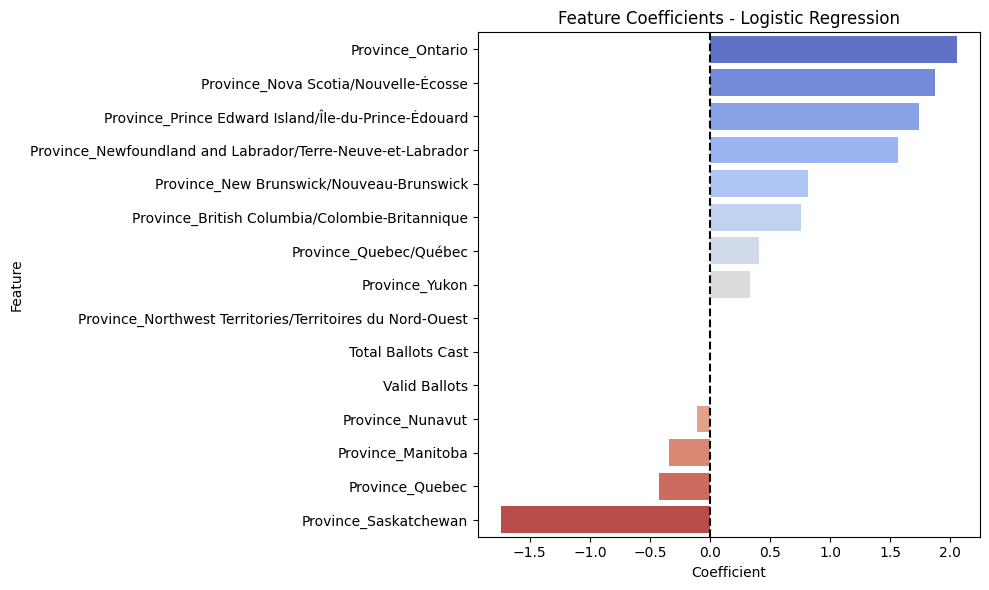

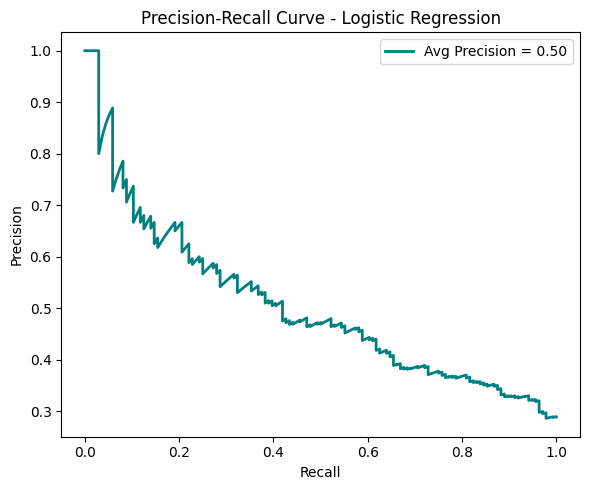

In [45]:
#Next, I want to explore Predictive Analytics (Classification Modeling) that might offer insight into future election outcomes. 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = combined_all
df = df.copy()
df = df.dropna(subset=['Province'])


df['Liberal_Win'] = (df['Party'] == 'Liberal').astype(int)
df['Valid Ballots'] = df['Valid Ballots'].replace(',', '', regex=True).astype(float)
df = pd.get_dummies(df, columns=['Province'], drop_first=True)
X = df[['Valid Ballots', 'Total Ballots Cast'] + [col for col in df.columns if col.startswith('Province_')]]
y = df['Liberal_Win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance)


#Creating visualizations for the Logistic Regression Model
# Get feature names and model coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Coefficients - Logistic Regression')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

#Creating a precision/Recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision-recall pairs
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, lw=2, color='teal', label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Based on the above, this model was created to predict Liberal wins as one example.
However, the model is better at identifying non-Liberal wins than it is at predicting Liberal wins. 
Precision for Class 1 (Liberal) is 0.51, meaning when it predicts a Liberal win, it's correct only 51% of the time. Recall is 0.39, meaning it misses many actual Liberal wins. F-1 score is also 0.44, reflecting the imbalance in precision and recall. 
Further, regarding the Confusion matrix; False negative (83) are Liberal wins that were wrongly predicted as non-Liberal.
False positives (51) are non-Liberal ridings predicted incorrectlty as Liberal. 


I have now completed a Logistic Regression model, however for my model to work better based on the available datasets, I should explore the following classification models, compare and provide feedback. 
I want to explore Decision Tree, Random Forest, K-Nearest Neighbors, and Naive Bayes classifiers.

Accuracy: 0.6305732484076433

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       335
           1       0.39      0.51      0.44       136

    accuracy                           0.63       471
   macro avg       0.58      0.59      0.58       471
weighted avg       0.66      0.63      0.64       471


Confusion Matrix:
 [[228 107]
 [ 67  69]]


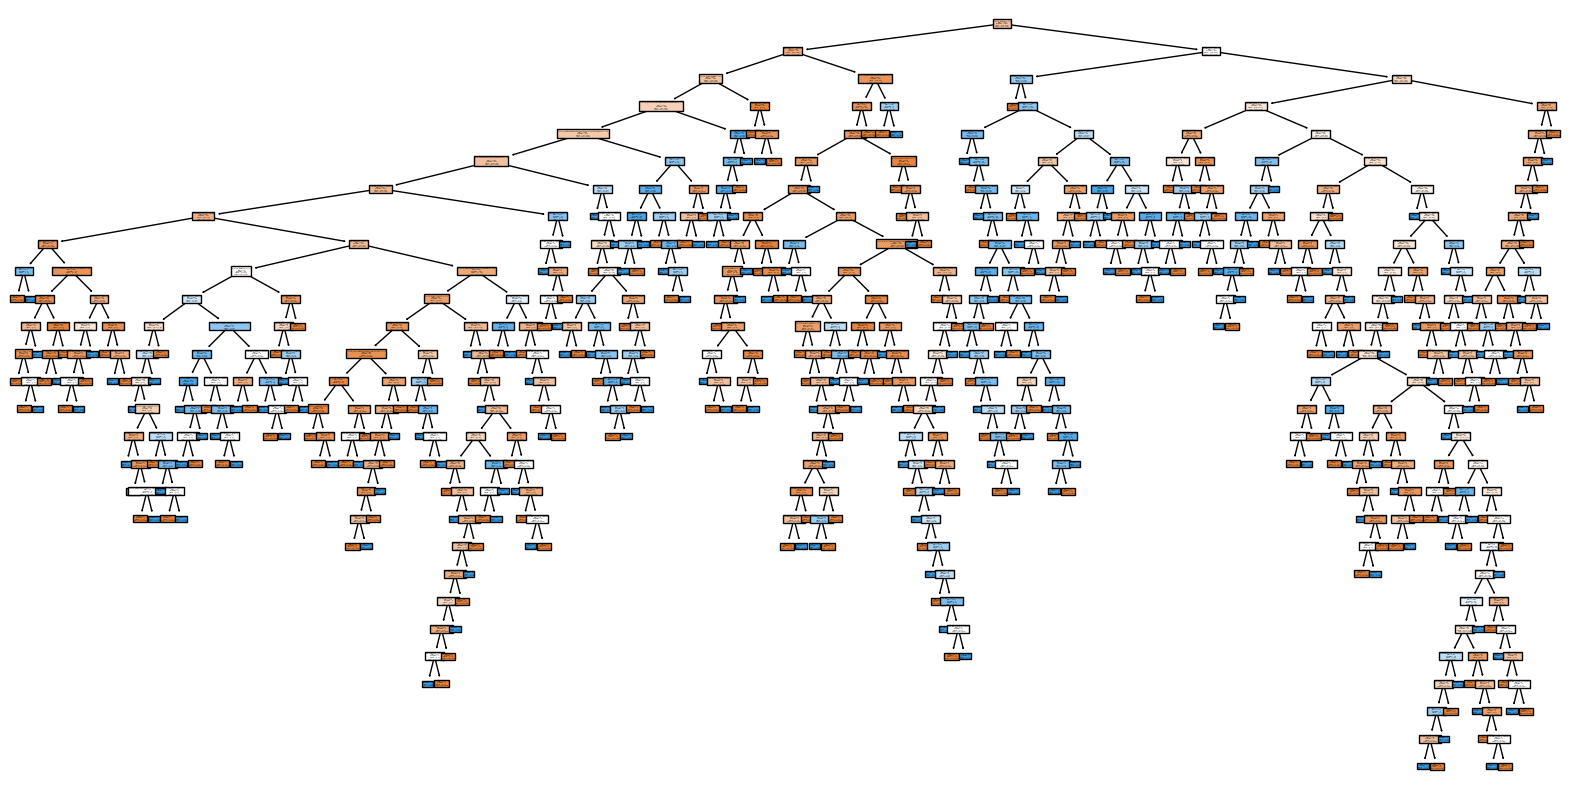

In [ ]:
#Target is: Whether Liberal Party won (1) or not (0) in any given riding or record.


#Decision Tree Classifier
#Since we were interested in predictin whether the Liberal Party wins, this becomes my dependent variable. 
 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


y = df['Liberal_Win']
x = df[['Valid Ballots', 'Total Ballots Cast'] + [col for col in df.columns if col.startswith('Province_')]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Liberal', 'Liberal'], filled=True)
plt.show()


Analysis of Decision Tree Classification:
Accuracy is 63.06% - so Decision Tree performs worse than Logistics Regression in terms of overall accuracy. 
Confusion Matrix: There is a high false positive (FP) at 107 - meaning the model frequently assumes a Liberal loss when it's actually a win. There are more errors in predicting Liberal wins - only 69 True Positives (TP). 
Precision for class 0 is 0.77 - meaning of the times it predicted Not Liberal, 77% were correct. Recall was 0.68 or 68%, meaning it caught 68% of actual Not Liberal wins. In conclusion, it performs moderately well in class 0 (Not Liberal win). 
Precision for class 1 is 0.39 - meaning only 39% of the time it predicted a Liberal win was it actually correct. Recall is 0.51, or it correctly identified 51% of actual Liberal wins. In conclusion, this model has a very weak performance on class 1; many Liberal Wins are missed or misclassified. 

The Decision Tree Model is not ideal to accurately detect Liberal Wins.


In [13]:
#Next I want to explore Random Forest model - it builds multiple decision trees, usually 
#more accurate and stable than a single decision tree.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

#Defining the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Fitting the model
rf_model.fit(X_train, y_train)

#Making Predictions
y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

#Feature importances to see which features were most important in prediction
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

Accuracy: 0.6645435244161358

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       335
           1       0.43      0.48      0.45       136

    accuracy                           0.66       471
   macro avg       0.60      0.61      0.60       471
weighted avg       0.68      0.66      0.67       471


Confusion Matrix:
 [[248  87]
 [ 71  65]]
                                              Feature  Importance
1                                  Total Ballots Cast    0.408446
0                                       Valid Ballots    0.407933
9                                    Province_Ontario    0.066557
7                Province_Nova Scotia/Nouvelle-Écosse    0.018092
5   Province_Newfoundland and Labrador/Terre-Neuve...    0.017893
13                              Province_Saskatchewan    0.017713
12                             Province_Quebec/Québec    0.012014
3                                   Province_Man

Analysis of Random Forest Classification:
Accuracy is 66.45%, slightly higher than Decision Tree but still lower than the Logistic Regression. 
According to the Confusion Matrix, the model predicted actual Liberal wins 65% of the time (TP). While (FN) was 71% of the time, where it incorrectly predicted a non-Liberal win. 
Precision, Recall, F-1 Scores; the model is much better at predicting class 0 (non-Liberal win). 
For Class 1(Liberal Win), precision is 0.43, meaning out of all predicted Liberal wins, only 43% were correct. Recall is 0.48, meaning the model correctly identified 48% of actual Liberal wins.

Feature Importance provides some more insights; the two ballot related features (Total Ballots Cast & Valid Ballots) account for over 81% of model decision-making. Provinces like Ontario, Nova Scotia has some influence but relatively small. Some areas have negligible impact, like Yukon, NWT, Nunavut. 
Similar to previous models, Ballot Counts dominate this model as well. 

Random Forest still struggles with recall and precision for predcting Liberal Wins. 

Accuracy: 0.7898089171974523

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       335
           1       0.66      0.57      0.61       136

    accuracy                           0.79       471
   macro avg       0.75      0.72      0.73       471
weighted avg       0.78      0.79      0.78       471


Confusion Matrix:
 [[295  40]
 [ 59  77]]


/var/folders/bs/hn0666fs7fb04r1kqbxj5t4h0000gn/T/ipykernel_25309/2269960553.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.fillna(0)
/Users/hm/Documents/Capstone Project/Canadian Election Analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


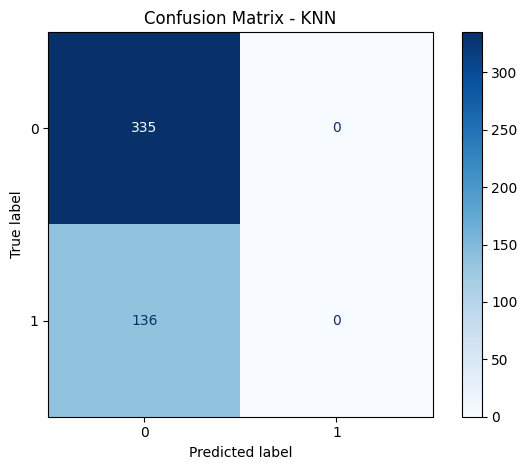

In [ ]:
#Now I would like to explore K-Nearest Neighbours (KNN) and compare to previous models

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#splitting features and target
X = df.drop(['Liberal_Win', 'Number of votes cast', 'Variance between first and second place (number of votes)', 'Variance (percentage)', 'Status of results (preliminary or validated)', 'Judicial recount requested or automatic', 'ï»¿Province', 'Province/territory', 'Electoral district', 'Number of Votes Cast', 'Riding', 'Elected Canadidate', 'Electoral District', 'Candidate', 'Electoral District Name', 'Political affiliation', 'Candidate who received the second-most votes', 'Party'], axis=1, errors='ignore')
y = df['Liberal_Win']

X = X.fillna(0)

#splitting train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#training KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#HeatMap Visualization
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.tight_layout()
plt.show()

Analysis of KNN Classification:
Accuracy for KNN Classification is 78.98%. This is higher than all previous models. 
According to the classification report, precision for class 1 (Liberal win) is 0.66 - meaning out of all predicted Liberal wins, 66% were correct. The Recall is 0.57 - meaning out of all actual Liberal wins, 57% were correctly identified. The F1-score of 0.61 shows a more balanced measure of precision and recall. 
According to the Confusion Matrix, the model correctly predicts most non-Liberal wins at 295 and captures a decent number of Liberal wins at 77, out of 136. Only 59 Liberal wins were missed (FN). 
This model is very good at detecting non-Liberal wins with precision and recall of class 0 being high. This model is better at detecting Liberal wins than Decision Tree and Random Forest. However, it's still lacking to identify all Liberal wins (recall of class 1 at 0.57), but it's a significant improvement over previous models. 

Accuracy: 0.7388535031847133

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       335
           1       0.58      0.33      0.42       136

    accuracy                           0.74       471
   macro avg       0.68      0.62      0.63       471
weighted avg       0.72      0.74      0.71       471


Confusion Matrix:
 [[303  32]
 [ 91  45]]


/var/folders/bs/hn0666fs7fb04r1kqbxj5t4h0000gn/T/ipykernel_25309/718864400.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.fillna(0)


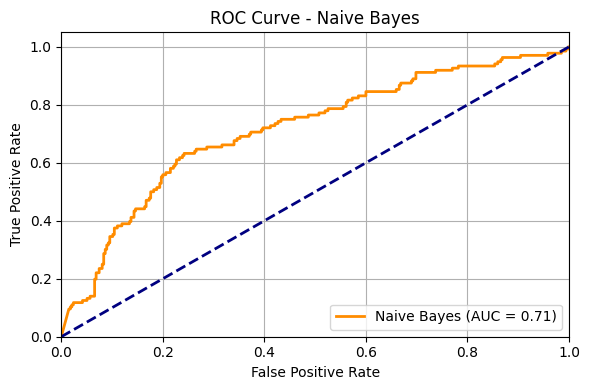

In [ ]:
#Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop non-numeric columns
X = df.drop(['Liberal_Win', 'Number of votes cast', 'Variance between first and second place (number of votes)', 'Variance (percentage)', 'Status of results (preliminary or validated)', 'Judicial recount requested or automatic', 'ï»¿Province', 'Province/territory', 'Electoral district', 'Number of Votes Cast', 'Riding', 'Elected Canadidate', 'Electoral District', 'Candidate', 'Electoral District Name', 'Political affiliation', 'Candidate who received the second-most votes', 'Party'], axis=1, errors='ignore')
y = df['Liberal_Win']

X = X.fillna(0)

#Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Visualizations for Naive Bayes
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob_nb = nb.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute ROC curve and AUC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


Analysis of Naive Bayes Classification:
Accuracy for Naive Bayes classification is 73.89%, which is slightly lower than KNN Model but still better than other previous models. 
Classification report - recall for class 1 is at 0.33, meaning it detected only 33% of actual Liberal wins, which is quiet low. 
As for the Confusion Matrix, the False Negatives are at 91, which means the model missed 91 Liberal wins. This is much higher than KNN Modeling. Naive Bayes does a very good job of predicting non-Liberal wins (class 0), but it struggles win Liberal wins. 

In Conclusion, I would recommend the K-Nearest Neighbor (KNN) Model for predicting Liberal wins as it has the highest accuracy, precision, and recall. As well as a more balanced F1-Score between the classes at 0.61. 
Below is a comparison chart of all the 5 models tried. 


📊 Side-by-Side Comparison: All 4 Classifiers

Model	Accuracy	Precision (1)	Recall (1)	F1-score (1)
Logistic Regression	0.7155	0.51	0.39	0.44
Decision Tree	0.6306	0.39	0.51	0.44
Random Forest	0.6645	0.43	0.48	0.45
KNN (k=5)	0.7898	0.66	0.57	0.61
Naive Bayes	0.7389	0.58	0.33	0.42

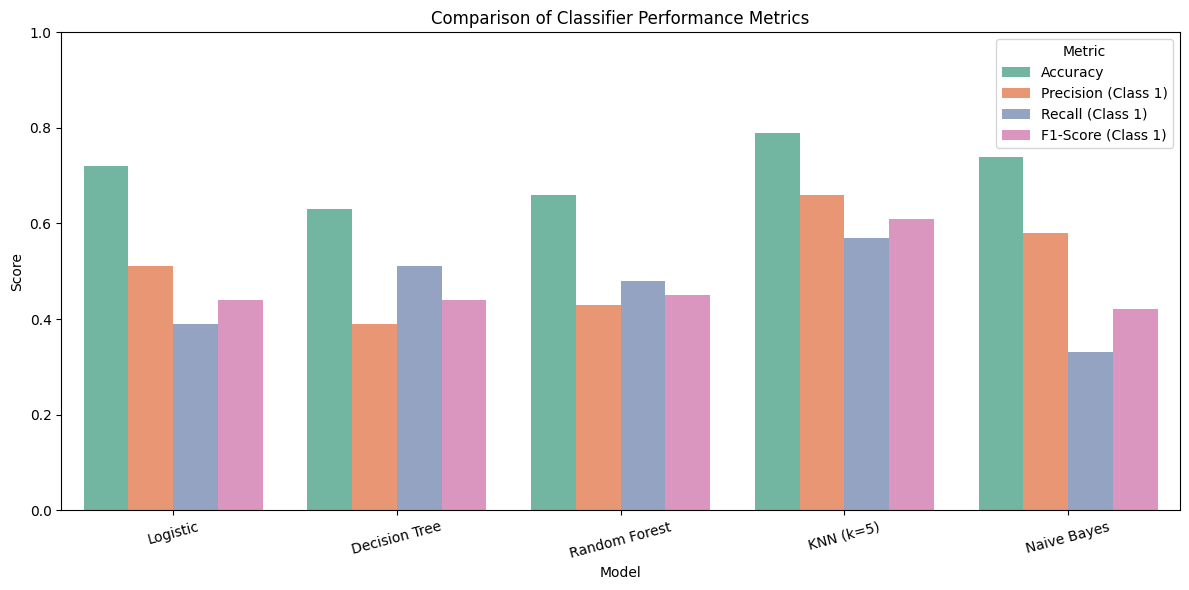

In [ ]:
#Below is a visualization of the results of all 5 classifers as a bar chart.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define model performance metrics
model_names = ['Logistic', 'Decision Tree', 'Random Forest', 'KNN (k=5)', 'Naive Bayes']
accuracy = [0.72, 0.63, 0.66, 0.79, 0.74]
precision = [0.51, 0.39, 0.43, 0.66, 0.58]
recall = [0.39, 0.51, 0.48, 0.57, 0.33]
f1 = [0.44, 0.44, 0.45, 0.61, 0.42]

# Create DataFrame
df_metrics = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy,
    'Precision (Class 1)': precision,
    'Recall (Class 1)': recall,
    'F1-Score (Class 1)': f1
})

# Melt for seaborn plotting
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Comparison of Classifier Performance Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric', loc='upper right')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()